In [1]:
import pandas as pd
from pathlib import Path
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


In [2]:
file_path = Path('Resources/cleaned_data.csv')
df = pd.read_csv(file_path)
df.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,CHDRisk,MAP
0,1.0,39,4,0.0,0,0,0,0,0,195,26.97,80,77,0,82.000000
1,0.0,46,2,0.0,0,0,0,0,0,250,28.73,95,76,0,94.333333
2,1.0,48,1,1.0,20,0,0,0,0,245,25.34,75,70,0,95.833333
3,0.0,61,3,1.0,30,0,0,1,0,225,28.58,65,103,1,113.333333
4,0.0,46,3,1.0,23,0,0,0,0,285,23.10,85,85,0,99.333333


In [3]:
y = df['CHDRisk']
X = df.drop(columns='CHDRisk')

In [4]:
y.value_counts()

CHDRisk
0    3084
1     553
Name: count, dtype: int64

In [5]:
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(df.drop('CHDRisk', axis=1), df['CHDRisk'])

y = y_resampled
X = X_resampled

In [6]:
y.value_counts()

CHDRisk
0    3084
1    3084
Name: count, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=1, stratify=y)

In [8]:
X_train.shape

(4626, 14)

In [9]:
y_train.shape

(4626,)

In [10]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [12]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [13]:
predictions = rf_model.predict(X_test_scaled)

In [14]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [19]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,710,61
Actual 1,9,762


Accuracy Score : 0.9546044098573282
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       771
           1       0.93      0.99      0.96       771

    accuracy                           0.95      1542
   macro avg       0.96      0.95      0.95      1542
weighted avg       0.96      0.95      0.95      1542



In [16]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.16290715435001107, 'age'),
 (0.1601715633452133, 'MAP'),
 (0.13705961724966595, 'BMI'),
 (0.12778111967866324, 'totChol'),
 (0.1277322893953915, 'glucose'),
 (0.10571307480095458, 'heartRate'),
 (0.05282851452796355, 'cigsPerDay'),
 (0.04005397425755201, 'education'),
 (0.030691450159476844, 'prevalentHyp'),
 (0.02654598142577374, 'sex'),
 (0.013366966400196021, 'smokingStatus'),
 (0.006823664523397577, 'BPMeds'),
 (0.00656184373054988, 'diabetes'),
 (0.0017627861551907007, 'prevalentStroke')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

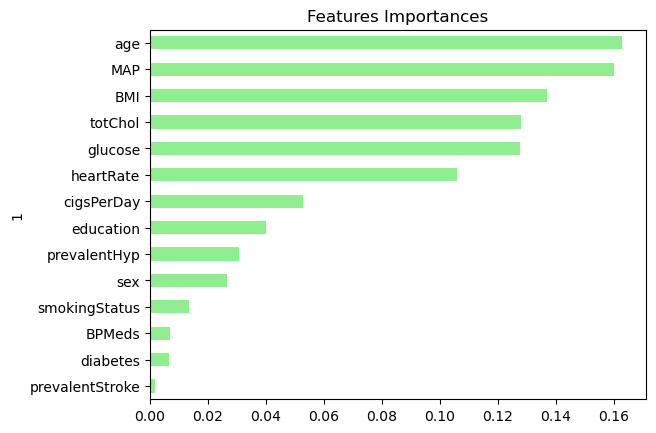

In [17]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)